<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code> 4 </code><b>

<b>Group Members:</b>  

1. <code>Riasat_B00974221</code>
2. <code>Mahsa_B00954491</code>
3. <code>Dorsa_B00965859</code>
4. <code>Lovelyn_B00926199</code>


# 1. Dataset Information 

<h4> Dataset Name: <code> cost_of_living_us.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties</code> </h4>
<h4> Dataset Description: The US Family Budget Dataset provides insights into the cost of living in different US counties based on the Family Budget Calculator by the Economic Policy Institute (EPI). This dataset offers community-specific estimates for ten family types, including one or two adults with zero to four children, in all 1877 counties and metro areas across the United States. This dataset contains 31431 Datapoints.</h4>
<code> Provide short description of the dataset here </code>

<h4> Dataset Name: <code> pop.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.census.gov/data/tables/time-series/demo/popest/2020s-counties-detail.html</code> </h4>
<h4> Dataset Description: This dataset features data containing county population estimates by demographic characteristics for years 2020 to 2022 For the United States. This dataset is is collected by the Census Beauru of the United States and containes data for all counties in all States and Territories of the United states. This dataset contains 12577 datapoints </h4>
<code> Provide short description of the dataset here </code>

<h4> Dataset Name: <code> weather.csv</code></h4>
<h4> Link to the Dataset: <code>https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/county/mapping/110/tavg/202212/60/value</code> </h4>
<h4> Dataset Description: This dataset features data containing county average temperate and weather from January 2018 to December 2022 For the United States. The Dataset is collected by the National Center for Environmental Information. This dataset contains 3108 datapoints for each county in the contigious United States. </h4>
<code> Provide short description of the dataset here </code>


# 2. Task Information 

<h4> Task Goal: <code> Predict the best places to move into given user preferences </code></h4>
<h4> Task Description: </h4>
    <code>This research introduces a specialized system designed to help both new immigrants and existing citizens of the United States be suggest the best states to move into. This is done by taking several user preferences regarding factors such as  income, cost of living, preferred weather, and preferred demographics etc. This approach ensures multiple facets are considered in regards to choosing the best states for each individual user.</code>

# 3. Task Implementation: Coding

### 3.1 Preprocessing 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset
import torch

In [2]:
df = pd.read_csv('cost_of_living_us.csv')
df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250


In [3]:
df['adult_count'] = df['family_member_count'].str[0]
df['child_count'] = df['family_member_count'].str[2]
df = df.drop(['family_member_count'], axis=1)
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0
31426,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1
31427,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2
31428,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3


Separate the number of Adults and Children from overall family member counts into seperate values. This is doen in order to both extract additional data and to account for more non traditional family structures.

In [4]:
us_states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [5]:
df_weather = pd.read_csv('weather.csv')
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,Alabama,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,Alabama,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,Alabama,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,Alabama,64,120.0,1.2,62.7
4,AL-009,Blount County,Alabama,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,Wyoming,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,Wyoming,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,Wyoming,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,Wyoming,44.4,91.0,1.0,43.4


In [6]:
df_weather['State'] =  df_weather['State'].apply(lambda x: us_states.get(x, x))
df_weather

,ID,Name,State,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [7]:
df_weather = df_weather.rename(columns={'Name':'county', 'State':'state'})
df_weather

,ID,county,state,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,AL-001,Autauga County,AL,65.8,121.0,1.9,63.9
1,AL-003,Baldwin County,AL,68.4,121.0,1.6,66.8
2,AL-005,Barbour County,AL,65.9,120.0,1.1,64.8
3,AL-007,Bibb County,AL,64,120.0,1.2,62.7
4,AL-009,Blount County,AL,62.6,121.0,2.0,60.6
...,...,...,...,...,...,...,...
3102,WY-037,Sweetwater County,WY,42.3,109.0,1.5,40.7
3103,WY-039,Teton County,WY,35.5,113.0,1.2,34.4
3104,WY-041,Uinta County,WY,40.3,108.0,1.2,39.1
3105,WY-043,Washakie County,WY,44.4,91.0,1.0,43.4


In [8]:
df= pd.merge(df, df_weather, on=['county', 'state'])
df

,case_id,state,isMetro,areaname,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,...,taxes,total_cost,median_family_income,adult_count,child_count,ID,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
0,1,AL,True,"Montgomery, AL MSA",Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,...,6392.94504,39254.0532,73010.414062,1,0,AL-001,65.8,121.0,1.9,63.9
1,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,...,7422.07836,57194.3256,73010.414062,1,1,AL-001,65.8,121.0,1.9,63.9
2,1,AL,True,"Montgomery, AL MSA",Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,...,9769.56228,76141.0308,73010.414062,1,2,AL-001,65.8,121.0,1.9,63.9
3,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,...,13101.70320,94203.5328,73010.414062,1,3,AL-001,65.8,121.0,1.9,63.9
4,1,AL,True,"Montgomery, AL MSA",Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,...,13469.21880,100823.5200,73010.414062,1,4,AL-001,65.8,121.0,1.9,63.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,3171,WY,False,"Weston County, WY",Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,...,6640.77324,55415.4672,80177.656250,2,0,WY-045,44.6,92.0,1.0,43.6
30656,3171,WY,False,"Weston County, WY",Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,...,7933.21068,75424.1832,80177.656250,2,1,WY-045,44.6,92.0,1.0,43.6
30657,3171,WY,False,"Weston County, WY",Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,...,9502.56228,96413.1684,80177.656250,2,2,WY-045,44.6,92.0,1.0,43.6
30658,3171,WY,False,"Weston County, WY",Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,...,11456.36724,113294.2260,80177.656250,2,3,WY-045,44.6,92.0,1.0,43.6


In [9]:
df = df.drop(['ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'areaname', 'case_id'], axis=1)
df = df.rename(columns={'Value': 'avg temp'})
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30655,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6
30656,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6
30657,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6
30658,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6


Combine the original dataframe with data from weather dataframe. Then remove the Columns 'ID', 'Rank', 'Anomaly (1901-2000 base period)', '1901-2000 Mean', 'areaname', 'case_id', as we only require Average Temperature for our specified years which is provided by the 'Value' Column.

In [10]:
df_pop = pd.read_csv('pop.csv')
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,50,1,1,Alabama,Autauga County,1,58802,28761,30041,3443,...,1055,1165,501,664,955,345,610,39.2,37.9,40.3
1,50,1,1,Alabama,Autauga County,2,58902,28819,30083,3457,...,1064,1170,501,669,958,350,608,39.1,37.9,40.3
2,50,1,1,Alabama,Autauga County,3,59210,28851,30359,3416,...,1074,1190,492,698,972,362,610,39.2,38.0,40.3
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
4,50,1,3,Alabama,Baldwin County,1,231761,113388,118373,12046,...,4861,5601,2542,3059,4610,1812,2798,43.7,42.5,44.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6
12572,50,56,45,Wyoming,Weston County,1,6840,3724,3116,308,...,109,175,70,105,191,73,118,43.5,42.7,44.8
12573,50,56,45,Wyoming,Weston County,2,6818,3724,3094,310,...,110,171,70,101,193,73,120,43.5,42.6,44.8
12574,50,56,45,Wyoming,Weston County,3,6766,3729,3037,302,...,115,151,66,85,184,69,115,43.9,43.1,45.3


In [11]:
df_pop = df_pop[df_pop['YEAR'] == 4]
df_pop

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,50,1,1,Alabama,Autauga County,4,59759,29105,30654,3460,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,50,1,3,Alabama,Baldwin County,4,246435,120164,126271,12470,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,50,1,5,Alabama,Barbour County,4,24706,13064,11642,1307,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,50,1,7,Alabama,Bibb County,4,22005,11775,10230,1159,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,50,1,9,Alabama,Blount County,4,59512,29583,29929,3414,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,50,56,37,Wyoming,Sweetwater County,4,41345,21469,19876,2319,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,50,56,39,Wyoming,Teton County,4,23287,12206,11081,1069,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,50,56,41,Wyoming,Uinta County,4,20712,10598,10114,1226,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,50,56,43,Wyoming,Washakie County,4,7719,3973,3746,378,...,187,250,125,125,212,73,139,44.8,43.3,46.6


We only take values for the 4th and latest years demographics as this is the most relavent for our research

In [12]:
df_pop = df_pop.drop(columns=['SUMLEV', 'YEAR', 'COUNTY', 'STATE'])
df_pop = df_pop.rename(columns={'STNAME':'state', 'CTYNAME':'county'})
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,Alabama,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,Alabama,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,Alabama,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,Alabama,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,Alabama,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,Wyoming,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,Wyoming,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,Wyoming,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,Wyoming,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [13]:
df_pop['state'] =  df_pop['state'].apply(lambda x: us_states.get(x, x))
df_pop

,state,county,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,UNDER5_MALE,UNDER5_FEM,AGE513_TOT,AGE513_MALE,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,59759,29105,30654,3460,1797,1663,7021,3612,...,1152,1225,495,730,1019,385,634,39.2,38.0,40.4
7,AL,Baldwin County,246435,120164,126271,12470,6427,6043,25992,13286,...,5709,6113,2811,3302,4933,1967,2966,44.1,42.9,45.3
11,AL,Barbour County,24706,13064,11642,1307,662,645,2446,1201,...,621,599,250,349,526,166,360,41.5,39.3,44.7
15,AL,Bibb County,22005,11775,10230,1159,576,583,2135,1100,...,460,508,229,279,418,122,296,40.9,39.1,43.6
19,AL,Blount County,59512,29583,29929,3414,1750,1664,6769,3459,...,1307,1328,563,765,1222,467,755,41.2,40.4,42.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,WY,Sweetwater County,41345,21469,19876,2319,1194,1125,5255,2749,...,503,590,287,303,498,174,324,37.7,37.8,37.6
12563,WY,Teton County,23287,12206,11081,1069,545,524,1966,981,...,394,395,183,212,356,147,209,41.0,41.0,41.1
12567,WY,Uinta County,20712,10598,10114,1226,601,625,2908,1514,...,255,316,147,169,277,104,173,38.0,38.1,37.9
12571,WY,Washakie County,7719,3973,3746,378,207,171,762,399,...,187,250,125,125,212,73,139,44.8,43.3,46.6


In [14]:
df_pop = df_pop[['state', 'county', 'POPEST_MALE', 'POPEST_FEM', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM']]
df_pop

,state,county,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
3,AL,Autauga County,29105,30654,38.0,40.4
7,AL,Baldwin County,120164,126271,42.9,45.3
11,AL,Barbour County,13064,11642,39.3,44.7
15,AL,Bibb County,11775,10230,39.1,43.6
19,AL,Blount County,29583,29929,40.4,42.1
...,...,...,...,...,...,...
12559,WY,Sweetwater County,21469,19876,37.8,37.6
12563,WY,Teton County,12206,11081,41.0,41.1
12567,WY,Uinta County,10598,10114,38.1,37.9
12571,WY,Washakie County,3973,3746,43.3,46.6


We only take the values of the columns 'POPEST_MALE', 'POPEST_FEM', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM'. This is done because the original population dataset has too many features for each group that might lead to unnecessary increased complexity for our model. These chosen columns contain the total population and Median ages for both sexes, which manage to capture most of the information with significant reduced number of features.

In [15]:
df= pd.merge(df, df_pop, on=['county', 'state'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,AL,True,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062,1,0,65.8,29105,30654,38.0,40.4
1,AL,True,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
2,AL,True,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062,1,2,65.8,29105,30654,38.0,40.4
3,AL,True,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062,1,3,65.8,29105,30654,38.0,40.4
4,AL,True,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062,1,4,65.8,29105,30654,38.0,40.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30555,WY,False,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.656250,2,0,44.6,3800,3060,43.6,46.0
30556,WY,False,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.656250,2,1,44.6,3800,3060,43.6,46.0
30557,WY,False,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.656250,2,2,44.6,3800,3060,43.6,46.0
30558,WY,False,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.656250,2,3,44.6,3800,3060,43.6,46.0


In [16]:
label_s = np.unique(df['state'])
label_c = np.unique(df['county'])

We now merge both the original and the population dataset based on the common columns 'county' and 'state'.

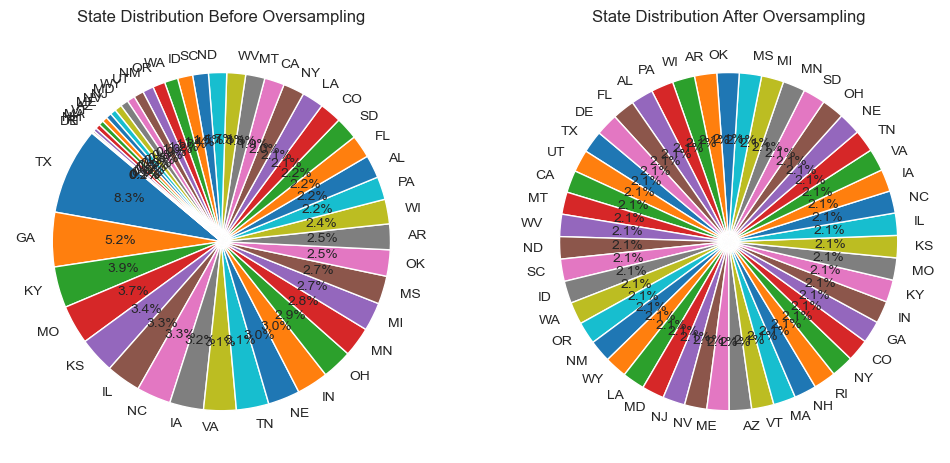

In [18]:
class_counts_before = df['state'].value_counts()
max_class_count = df['state'].value_counts().max()

oversampled_data = []
for class_label, count in df['state'].value_counts().items():
    class_data = df[df['state'] == class_label]
    oversampled_data.append(class_data.sample(max_class_count, replace=True))

df = pd.concat(oversampled_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(class_counts_before, labels=class_counts_before.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('State Distribution Before Oversampling')

axs[1].pie(df['state'].value_counts(), labels= df['state'].value_counts().index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('State Distribution After Oversampling')

plt.show()

We now account for data imbalance by oversampling the dataset to equalize the number of datapoints for each state. We show a pie chart of the class distribution of states before and after oversampling. 

In [19]:
df.isnull().sum()

state                     0
isMetro                   0
county                    0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
adult_count               0
child_count               0
avg temp                  0
POPEST_MALE               0
POPEST_FEM                0
MEDIAN_AGE_MALE           0
MEDIAN_AGE_FEM            0
dtype: int64

In [20]:
encoder = LabelEncoder()
df['isMetro'] = encoder.fit_transform(df['isMetro'])
df['state'] = encoder.fit_transform(df['state'])
df['county'] = encoder.fit_transform(df['county'])
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
25295,39,0,418,6852.0000,5611.21440,13484.8956,11013.58008,4515.91404,0.00000,5194.19940,46671.8028,45030.429688,2,0,63.6,1059,1096,37.1,45.3
25572,39,0,591,8808.0000,7101.75516,12812.0616,10946.25072,5764.73184,8342.57808,3253.78128,57029.1564,74404.843750,1,2,62.3,11354,10827,28.4,27.7
26423,39,0,1073,11292.0000,8846.43456,13473.9960,13665.98160,7296.94920,9352.26492,3441.10140,67368.7260,80383.023438,1,3,65.4,5559,3384,32.6,40.8
26224,39,0,946,11940.0000,11523.71700,15501.3672,16385.71200,8501.83008,9300.59184,3540.79692,76694.0160,68540.640625,1,4,58.1,1483,1371,40.5,43.1
27236,39,1,1757,13044.0000,7125.76176,14631.6876,13917.63720,7308.30024,7163.15556,7052.37084,70242.9144,77097.179688,2,1,64.9,37859,37036,38.6,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,5,1,847,18312.0000,9025.75488,13336.4184,14384.15880,9905.54664,16467.51600,13278.67200,94710.0648,72821.476562,1,3,57,90346,96600,37.0,40.0
2806,5,1,1131,15422.9892,8120.05440,13155.6312,14277.18600,8530.57392,9703.64724,10866.33624,80076.4224,94024.406250,2,1,56,279827,295667,38.1,40.5
2818,5,1,1555,15672.0000,13141.52400,15535.5984,20073.63840,10440.27612,15383.77320,11847.47676,102094.2888,76750.109375,2,3,58.1,124347,131609,50.8,54.5
2799,5,1,847,18312.0000,13528.65360,15294.2676,22971.86520,11537.12400,16467.51600,12348.07800,110459.5080,72821.476562,2,4,57,90346,96600,37.0,40.0


In [21]:
df = df.apply(pd.to_numeric)
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
25295,39,0,418,6852.0000,5611.21440,13484.8956,11013.58008,4515.91404,0.00000,5194.19940,46671.8028,45030.429688,2,0,63.6,1059,1096,37.1,45.3
25572,39,0,591,8808.0000,7101.75516,12812.0616,10946.25072,5764.73184,8342.57808,3253.78128,57029.1564,74404.843750,1,2,62.3,11354,10827,28.4,27.7
26423,39,0,1073,11292.0000,8846.43456,13473.9960,13665.98160,7296.94920,9352.26492,3441.10140,67368.7260,80383.023438,1,3,65.4,5559,3384,32.6,40.8
26224,39,0,946,11940.0000,11523.71700,15501.3672,16385.71200,8501.83008,9300.59184,3540.79692,76694.0160,68540.640625,1,4,58.1,1483,1371,40.5,43.1
27236,39,1,1757,13044.0000,7125.76176,14631.6876,13917.63720,7308.30024,7163.15556,7052.37084,70242.9144,77097.179688,2,1,64.9,37859,37036,38.6,39.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,5,1,847,18312.0000,9025.75488,13336.4184,14384.15880,9905.54664,16467.51600,13278.67200,94710.0648,72821.476562,1,3,57.0,90346,96600,37.0,40.0
2806,5,1,1131,15422.9892,8120.05440,13155.6312,14277.18600,8530.57392,9703.64724,10866.33624,80076.4224,94024.406250,2,1,56.0,279827,295667,38.1,40.5
2818,5,1,1555,15672.0000,13141.52400,15535.5984,20073.63840,10440.27612,15383.77320,11847.47676,102094.2888,76750.109375,2,3,58.1,124347,131609,50.8,54.5
2799,5,1,847,18312.0000,13528.65360,15294.2676,22971.86520,11537.12400,16467.51600,12348.07800,110459.5080,72821.476562,2,4,57.0,90346,96600,37.0,40.0


In [22]:
df = df.sample(frac=1).reset_index(drop=True)
df

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,5,1,1131,19180.8132,15365.32560,15636.39360,22971.86520,12517.42800,17193.44640,14137.08600,117002.3556,94024.406250,2,4,56.0,279827,295667,38.1,40.5
1,29,1,1701,20921.3844,15320.52840,14914.93800,19100.59320,13131.87480,20216.70240,9683.28876,113289.3048,81416.007812,2,4,50.1,252779,243966,38.1,39.5
2,18,0,19,7092.0000,5801.42436,13691.68920,11797.37988,4671.79620,0.00000,7088.01192,50142.3048,60201.785156,2,0,41.3,4942,3865,45.2,54.0
3,19,0,552,5808.0000,3133.28796,11399.01564,4770.69000,3239.78100,0.00000,4947.99792,33298.7724,71686.835938,1,0,45.1,7047,6879,43.1,44.8
4,26,0,388,11928.0000,10729.29120,13750.59840,9704.06832,8209.63032,14108.45400,4625.80476,73055.8476,64788.617188,1,3,40.9,16322,15182,48.7,51.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,39,0,744,8808.0000,6541.67940,12570.83520,10946.25072,5561.79384,8472.07692,3063.64836,55964.2848,58125.542969,1,2,60.4,10615,10546,34.9,36.9
119376,3,0,1474,21240.0000,13214.73480,18376.67880,22225.94280,12484.30920,13927.40760,14671.21200,116140.2888,76583.765625,2,3,48.5,1630,1587,53.0,54.4
119377,8,0,73,10668.0000,10835.35176,16135.49520,17130.80760,7791.51264,11189.79708,8125.13304,81876.0996,63626.250000,2,3,48.2,2762,2836,45.8,46.6
119378,13,0,421,6180.0000,5154.70896,13263.00480,9741.58008,4107.01212,0.00000,6453.07032,44899.3764,48004.117188,2,0,58.6,2949,2997,43.8,45.9


We now finalize our data preprocessing with the following steps:

1. Check for any null values that might exist in the dataset.
2. Use Label Encoding to encode all categorical data to numeric data to be more freely usable to ML and Deep Learning Models.
3. Change Types of all columns in the dataset to be numeric in case some columns do not have the correct type despite all of them being numerical data.
4. We shuffle the dataset so that no model can find any patterns from the arrangement of the data 

In [23]:
state_grp = dict(tuple(df.groupby('state')))
state_grp[0]

,state,isMetro,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
8,0,1,609,5611.65456,5611.21440,12921.88200,11186.95968,4066.48788,0.00000,6433.45308,45831.6504,52019.007812,2,0,67.6,13177,13606,41.9,44.0
93,0,0,389,8268.00000,10044.01680,14328.80280,16991.91360,6635.16648,12047.34840,8752.96872,77068.2192,49986.917969,2,2,63.7,5114,5052,49.7,51.2
130,0,1,85,11064.00000,10733.60664,14768.10840,16888.01400,7898.13276,15348.19920,10867.22676,87567.2868,77884.757812,2,2,68.4,120164,126271,42.9,45.3
192,0,1,757,6769.89996,6162.82476,12264.59640,11186.95968,4686.03624,0.00000,6841.02756,47911.3452,62393.031250,2,0,68.0,51910,56169,38.7,41.8
227,0,1,683,6969.67896,5061.12708,12281.31480,8066.79564,4359.23544,4560.65520,5240.38296,46539.1908,55991.796875,1,1,64.5,6939,7656,38.5,41.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119256,0,0,432,7752.00000,7079.35176,11371.86036,11305.12356,5373.98400,11579.54076,6067.89840,60529.7580,46549.105469,1,2,66.1,17169,19598,38.7,43.4
119319,0,1,78,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.82980,7422.07836,57194.3256,73010.414062,1,1,65.8,29105,30654,38.0,40.4
119321,0,1,1679,8688.00000,6889.02612,13406.37360,14666.69880,5644.17072,5004.01752,7720.96512,62019.2520,59071.250000,2,1,63.0,31368,32971,40.0,43.3
119366,0,0,321,9468.00000,8936.09472,13907.96880,14114.29080,6668.52900,13656.63960,7752.40644,74503.9332,48013.359375,1,3,66.0,5916,6523,45.4,48.4


In [89]:
df_x = df.drop(columns=['state', 'county'])
df_x = df_x.astype('float64')
df_x

,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,adult_count,child_count,avg temp,POPEST_MALE,POPEST_FEM,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
0,1.0,19180.8132,15365.32560,15636.39360,22971.86520,12517.42800,17193.44640,14137.08600,117002.3556,94024.406250,2.0,4.0,56.0,279827.0,295667.0,38.1,40.5
1,1.0,20921.3844,15320.52840,14914.93800,19100.59320,13131.87480,20216.70240,9683.28876,113289.3048,81416.007812,2.0,4.0,50.1,252779.0,243966.0,38.1,39.5
2,0.0,7092.0000,5801.42436,13691.68920,11797.37988,4671.79620,0.00000,7088.01192,50142.3048,60201.785156,2.0,0.0,41.3,4942.0,3865.0,45.2,54.0
3,0.0,5808.0000,3133.28796,11399.01564,4770.69000,3239.78100,0.00000,4947.99792,33298.7724,71686.835938,1.0,0.0,45.1,7047.0,6879.0,43.1,44.8
4,0.0,11928.0000,10729.29120,13750.59840,9704.06832,8209.63032,14108.45400,4625.80476,73055.8476,64788.617188,1.0,3.0,40.9,16322.0,15182.0,48.7,51.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119375,0.0,8808.0000,6541.67940,12570.83520,10946.25072,5561.79384,8472.07692,3063.64836,55964.2848,58125.542969,1.0,2.0,60.4,10615.0,10546.0,34.9,36.9
119376,0.0,21240.0000,13214.73480,18376.67880,22225.94280,12484.30920,13927.40760,14671.21200,116140.2888,76583.765625,2.0,3.0,48.5,1630.0,1587.0,53.0,54.4
119377,0.0,10668.0000,10835.35176,16135.49520,17130.80760,7791.51264,11189.79708,8125.13304,81876.0996,63626.250000,2.0,3.0,48.2,2762.0,2836.0,45.8,46.6
119378,0.0,6180.0000,5154.70896,13263.00480,9741.58008,4107.01212,0.00000,6453.07032,44899.3764,48004.117188,2.0,0.0,58.6,2949.0,2997.0,43.8,45.9


In [90]:
scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)
df_x

array([[ 1.19668627,  1.51099948,  1.96604455, ...,  1.20341015,
        -0.58173427, -0.54162649],
       [ 1.19668627,  1.87403591,  1.95301155, ...,  0.92816871,
        -0.58173427, -0.72015915],
       [-0.83564091, -1.0104025 , -0.8164149 , ..., -0.35006082,
         0.72795677,  1.86856445],
       ...,
       [-0.83564091, -0.26454488,  0.64812332, ..., -0.35553893,
         0.83863488,  0.54742275],
       [-0.83564091, -1.20062122, -1.00456609, ..., -0.35468181,
         0.46970783,  0.42244988],
       [ 1.19668627,  0.22988239,  1.62718881, ..., -0.22549651,
        -0.58173427, -0.70230589]])

In [91]:
df_x = df_x - df_x.min().min()
df_x

array([[7.93087115, 8.24518436, 8.70022944, ..., 7.93759504, 6.15245061,
        6.19255839],
       [7.93087115, 8.6082208 , 8.68719643, ..., 7.6623536 , 6.15245061,
        6.01402573],
       [5.89854397, 5.72378238, 5.91776998, ..., 6.38412406, 7.46214165,
        8.60274933],
       ...,
       [5.89854397, 6.46964   , 7.3823082 , ..., 6.37864596, 7.57281976,
        7.28160763],
       [5.89854397, 5.53356366, 5.7296188 , ..., 6.37950308, 7.20389271,
        7.15663477],
       [7.93087115, 6.96406727, 8.3613737 , ..., 6.50868837, 6.15245061,
        6.031879  ]])

We separate out all labels from the original dataframe and put in into a new dataframe. Then wo do the following transformations to the new Dataset:

1. We convert all columns to float64. This is done so that all columns in the dataframe share a type to make future transformations easier.
2. We scale the data using a Standard Scaler. This is done because most of the columns contains data that are not on similar scales, which might lead to errors for several machine learning algorithms.
3. We then shift the scaled values to only contain positive values. This is done by subtracting the lowest negative value from all datapoints. This way, the lowest value in the dataframe becomes 0, thereby placing all other datapoints on the positive scales. This is done because some algorithms like Naive Bayes work best on positive values. 

In [92]:
state_grp_x = state_grp.copy()
scaler = StandardScaler()

for key, value in state_grp_x.items():
    state_grp_x[key] = state_grp_x[key].drop(columns=['state', 'county'])
    state_grp_x[key] = state_grp_x[key].astype('float64')
    state_grp_x[key] = scaler.fit_transform(state_grp_x[key])

state_grp_x[0]

array([[ 1.11793496, -1.53458814, -0.86591717, ..., -0.45055595,
         0.6116759 ,  0.351891  ],
       [-0.89450642, -0.40200737,  0.50283826, ..., -0.59882983,
         2.91588422,  2.55979668],
       [ 1.11793496,  0.79011764,  0.71576899, ...,  1.50236396,
         0.90708722,  0.75054064],
       ...,
       [ 1.11793496, -0.22293279, -0.471356  , ..., -0.11488565,
         0.05039438,  0.13723351],
       [-0.89450642,  0.10963427,  0.1607354 , ..., -0.57333171,
         1.64561553,  1.70116669],
       [ 1.11793496, -0.8829505 , -1.58940118, ..., -0.28208811,
        -0.24501694, -0.78272719]])

In [93]:
df_y = df[['state', 'county']]
df_y = df_y.astype('int64')
df_y

,state,county
0,5,1131
1,29,1701
2,18,19
3,19,552
4,26,388
...,...,...
119375,39,744
119376,3,1474
119377,8,73
119378,13,421


In [94]:
n_states = len(np.unique(df_y['state']))
n_states

47

In [95]:
state_grp_y = state_grp.copy()
county_map = {}
n_county_grp = {}

for key, value in state_grp_y.items():
    state_grp_y[key] = state_grp_y[key][['state', 'county']]
    state_grp_y[key] = state_grp_y[key].astype('int64')
    temp = pd.DataFrame(state_grp_y[0]['county'].unique())
    temp['index'] = temp.index
    temp['original'] = "0-"+ temp[0].astype('str')
    n_county_grp[key] = len(np.unique(state_grp_y[key]['county']))

temp = pd.DataFrame(state_grp_y[0]['county'].unique())
temp['index'] = temp.index
temp['original'] = "0-"+ temp[0].astype('str')
temp

,0,index,original
0,609,0,0-609
1,389,1,0-389
2,85,2,0-85
3,757,3,0-757
4,683,4,0-683
...,...,...,...
62,556,62,0-556
63,1074,63,0-1074
64,339,64,0-339
65,450,65,0-450


We then seperate out the labels into their own dataframe. Note that since we are only predicting states, we only use the states columns for all predictions.

In [97]:
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(df_x, df_y, test_size=0.33, random_state=42, stratify=df_y['state'])
x_train_s

array([[5.89854397, 8.23166607, 7.76570407, ..., 6.72594922, 6.3922532 ,
        6.19255839],
       [7.93087115, 8.41687903, 6.18282988, ..., 7.00472561, 8.99318892,
        9.19190711],
       [7.93087115, 5.96083796, 5.0781318 , ..., 6.63631381, 5.10100852,
        4.97853629],
       ...,
       [5.89854397, 6.61981268, 6.91670066, ..., 6.3650066 , 6.53982402,
        6.94239557],
       [7.93087115, 6.79839302, 6.62107037, ..., 6.52824238, 6.28157508,
        6.15685186],
       [7.93087115, 5.59671137, 5.16264884, ..., 6.469591  , 6.26312873,
        6.37109105]])

In [98]:
x_train_grp = {}
x_test_grp = {}
y_train_grp = {}
y_test_grp = {}


for key, value in state_grp.items():
    x_train_grp[key], x_test_grp[key], y_train_grp[key], y_test_grp[key] = train_test_split(state_grp_x[key], state_grp_y[key], test_size=0.33, random_state=42)


In [99]:
x_train_sr = torch.FloatTensor(x_train_s)
x_test_sr = torch.FloatTensor(x_test_s)
x_train_sr

tensor([[5.8985, 8.2317, 7.7657,  ..., 6.7259, 6.3923, 6.1926],
        [7.9309, 8.4169, 6.1828,  ..., 7.0047, 8.9932, 9.1919],
        [7.9309, 5.9608, 5.0781,  ..., 6.6363, 5.1010, 4.9785],
        ...,
        [5.8985, 6.6198, 6.9167,  ..., 6.3650, 6.5398, 6.9424],
        [7.9309, 6.7984, 6.6211,  ..., 6.5282, 6.2816, 6.1569],
        [7.9309, 5.5967, 5.1626,  ..., 6.4696, 6.2631, 6.3711]])

In [100]:
y_train_sr = torch.LongTensor(y_train_s['state'].values)
y_test_sr = torch.LongTensor(y_test_s['state'].values)
y_train_sr

tensor([ 3, 15, 39,  ..., 25,  1, 32])

In [101]:
x_train_grp_r = {}
x_test_grp_r = {}
y_train_grp_r = {}
y_test_grp_r = {}

for key, value in state_grp.items():
    x_train_grp_r[key] = torch.FloatTensor(x_train_grp[key])
    x_test_grp_r[key] = torch.FloatTensor(x_test_grp[key])
    y_train_grp_r[key] = torch.LongTensor(y_train_grp[key]['county'].values)
    y_test_grp_r[key] = torch.LongTensor(y_test_grp[key]['county'].values)
    
x_train_grp_r[0]

tensor([[ 1.1179,  0.6857, -0.2155,  ...,  1.3917, -1.4267, -1.2734],
        [-0.8945,  0.1454,  0.6886,  ..., -0.4096, -0.4813, -0.7827],
        [ 1.1179,  0.2415, -1.5702,  ...,  5.3718, -1.0131, -1.0894],
        ...,
        [-0.8945,  0.6315,  0.3176,  ..., -0.3230,  1.5275,  1.3945],
        [ 1.1179,  1.2180, -0.2950,  ..., -0.1550, -0.5404, -0.7521],
        [ 1.1179, -0.2280, -0.4202,  ...,  0.3444, -0.6586, -0.5987]])

In [102]:
train_db_s = TensorDataset(x_train_sr, y_train_sr)
data_loader_s = DataLoader(train_db_s, batch_size=n_states, shuffle=False)

In [103]:
train_db_grp = {}
data_loader_grp = {}

for key, value in state_grp.items():
    train_db_grp[key] = TensorDataset(x_train_grp_r[key], y_train_grp_r[key])
    data_loader_grp[key] = DataLoader(train_db_grp[key], batch_size=n_county_grp[key])    

In [104]:
input_dim = df_x.shape[1]
input_dim

17

We then split the x and y dataframes into train test sets to be used by the models. These sets are then turned into tensors for use in our custom neural network.

### 3.2 Model development and training 

In [105]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

###### Logistic Regression

In [106]:
logreg_classifier = LogisticRegression(multi_class='multinomial')
logreg_classifier.fit(x_train_s, y_train_s['state'])
logreg_pred =  logreg_classifier.predict(x_test_s)

C:\Users\riasa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We use Multonomial logistic regression model for the  prediction of states.

###### SVM Classifier


In [119]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred = svm_classifier.predict(x_test_s)

In [125]:
svm_classifier = SVC(kernel='linear', decision_function_shape='ovo')
svm_classifier.fit(x_train_s, y_train_s['state'])
svm_pred_ova = svm_classifier.predict(x_test_s)

We use Multonomial logistic regression model for the  prediction of states. We use both the one-vs-all and one-vs-one strategies.

###### Naive Bayes Classifier


In [109]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_s, y_train_s['state'])
nb_pred = nb_classifier.predict(x_test_s)

We use Multonomial Naive Bayes model for the  prediction of states.

###### Custom Neural Network

In [116]:
class Net(nn.Module):
    def __init__(self, os):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.elu1 = nn.ELU()
        self.fc2 = nn.Linear(32, 64)
        self.elu2 = nn.ELU()
        self.fc3 = nn.Linear(64, 128)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(128, 256)
        self.elu4 = nn.ELU()
        self.fc5 = nn.Linear(256, 512)
        self.elu5 = nn.ELU()
        self.fc6 = nn.Linear(512, 1024)
        self.elu6 = nn.ELU()
        self.fc7 = nn.Linear(1024, os)

    def forward(self, x):
        x = self.fc1(x)
        x = self.elu1(x)
        x = self.fc2(x)
        x = self.elu2(x)
        x = self.fc3(x)
        x = self.elu3(x)
        x = self.fc4(x)
        x = self.elu4(x)
        x = self.fc5(x)
        x = self.elu5(x)
        x = self.fc6(x)
        x = self.elu6(x)
        x = self.fc7(x)
        return x

In [131]:
model_s = Net(n_states)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_s.parameters(), lr=0.00001)

train_acc = []
train_pre = []
train_rec = []
train_f1 = []
train_loss = []

epochs = 100

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s = model_s.to(device)

for epoch in range(epochs):
    output1 = model_s(x_train_sr.to(device))
    total_loss = 0.00
    correct_predictions = 0
    total_samples = 0
    
    all_labels = []
    all_preds = []

    for batch_idx, (inputs, labels) in enumerate(data_loader_s, 1):
        model_s.train()
        inputs ,labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model_s(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

        if batch_idx % 100 == 0 or batch_idx == len(data_loader_s):
            avg_l = total_loss / batch_idx
            avg_acc = correct_predictions/total_samples
            print('Epoch', epoch+1, '/', epochs, 'Batch', batch_idx, '/', len(data_loader_s), 'Loss', avg_l, 'Batch Accuracy', avg_acc)



    avg_e_loss = total_loss / len(data_loader_s)
    acc =  accuracy_score(all_labels, all_preds)
    
    train_acc.append(accuracy_score(all_labels, all_preds))
    train_pre.append(precision_score(all_labels, all_preds, average='macro', zero_division=0.0))
    train_rec.append(recall_score(all_labels, all_preds, average='macro' ,zero_division=0.0))
    train_f1.append(f1_score(all_labels, all_preds, average='macro',zero_division=0.0))
    train_loss.append(avg_e_loss)
    print('====================================================')
    print('Epoch', epoch+1, '/', epochs, 'Average Loss: ', avg_e_loss, 'Average Accuracy for Epoch', acc)
    print('====================================================')

Epoch 1 / 100 Batch 100 / 1702 Loss 3.8510188674926757 Batch Accuracy 0.018085106382978722
Epoch 1 / 100 Batch 200 / 1702 Loss 3.8495764076709746 Batch Accuracy 0.019680851063829788
Epoch 1 / 100 Batch 300 / 1702 Loss 3.8475241430600486 Batch Accuracy 0.023333333333333334
Epoch 1 / 100 Batch 400 / 1702 Loss 3.8456101953983306 Batch Accuracy 0.027393617021276597
Epoch 1 / 100 Batch 500 / 1702 Loss 3.8432165484428404 Batch Accuracy 0.030382978723404255
Epoch 1 / 100 Batch 600 / 1702 Loss 3.8400536624590558 Batch Accuracy 0.03407801418439716
Epoch 1 / 100 Batch 700 / 1702 Loss 3.8357294147355216 Batch Accuracy 0.03553191489361702
Epoch 1 / 100 Batch 800 / 1702 Loss 3.829092217683792 Batch Accuracy 0.04
Epoch 1 / 100 Batch 900 / 1702 Loss 3.8190549813376533 Batch Accuracy 0.044326241134751775
Epoch 1 / 100 Batch 1000 / 1702 Loss 3.803243770122528 Batch Accuracy 0.04742553191489362
Epoch 1 / 100 Batch 1100 / 1702 Loss 3.7835709619522095 Batch Accuracy 0.04969052224371373
Epoch 1 / 100 Batch

For our custom neural network, we opted for a moderately complex network, with 5 hidden layers between the input and output layers. We used ELU activation function for these hidden layers to avoid the dying relu problem, which occurs when the relu activation function outputs only 0 for all inputs. We used Cross Entropy loss for multi classification. We also used Adam optimizer as it tends to be the most well rounded optimizer for neural networks. We train our model with a learning rate of 1X10^-4 for 100 epochs. This ensures that the model will be able to slowly learn the patterns hidden in the data without a high risk of overfitting on the training data.

In [55]:
# for key in state_grp.keys():
# 
#     model_c = Net(n_county_grp[key])
#     criterion = nn.CrossEntropyLoss()
#     optimizer = optim.Adam(model_c.parameters(), lr=0.0001)
#     
#     epochs = 1
#     for epoch in range(epochs):
#         output1 = model_c(x_train_grp_r[key])
#         total_loss = 0.00
#         correct_predictions = 0
#         total_samples = 0
#     
#         for batch_idx, (inputs, labels) in enumerate(data_loader_grp[key], 1):
#             optimizer.zero_grad()
#             outputs = model_c(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
#     
#             total_loss += loss.item()
#     
#             _, predicted = torch.max(outputs, 1)
#             total_samples += labels.size(0)
#             correct_predictions += (predicted == labels).sum().item()
#             
#     
#             if batch_idx % 100 == 0 or batch_idx == len(data_loader_grp[key]):
#                 avg_l = total_loss / batch_idx
#                 avg_acc = correct_predictions/total_samples
#                 print('Epoch', epoch+1, '/', epochs, 'Batch', batch_idx, '/', len(data_loader_s), 'Loss', avg_l, 'Accuracy', avg_acc)
#     
#     
#     
#         avg_e_loss = total_loss / len(data_loader_s)
#         avg_e_acc =  correct_predictions/total_samples
#         print('====================================================')
#         print('Epoch', epoch+1, '/', epochs, 'Average Loss: ', avg_e_loss, 'Average Accuracy', avg_e_acc)
#         print('====================================================')

### 3.3 Model evaluation

###### Logistic Regression


In [123]:
print("Logistic Regression Accuracy", accuracy_score(y_test_s['state'], logreg_pred))
print("Logistic Regression Precision", precision_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression  Recall", recall_score(y_test_s['state'], logreg_pred, average='macro'))
print("Logistic Regression F1 Score", f1_score(y_test_s['state'], logreg_pred, average='macro'))

Logistic Regression Accuracy 0.6028276982434765
Logistic Regression Precision 0.5985153451190507
Logistic Regression  Recall 0.6028366171628416
Logistic Regression F1 Score 0.5987660856682738


Here we see that our logistic regressor model gets low scores across the board. This might signal complex relationships between data and a relatively high amount of outliers in the data.

###### SVM Classifier


In [122]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred, average='macro'))

SVM Classifier Accuracy 0.8478779571530105
SVM Classifier Precision 0.8484407095538821
SVM Classifier Recall 0.8478853015964302
SVM Classifier F1 Score 0.8468065604521687


In [126]:
print("SVM Classifier Accuracy", accuracy_score(y_test_s['state'], svm_pred_ova))
print("SVM Classifier Precision", precision_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier Recall", recall_score(y_test_s['state'], svm_pred_ova, average='macro'))
print("SVM Classifier F1 Score", f1_score(y_test_s['state'], svm_pred_ova, average='macro'))

SVM Classifier Accuracy 0.8478779571530105
SVM Classifier Precision 0.8484407095538821
SVM Classifier Recall 0.8478853015964302
SVM Classifier F1 Score 0.8468065604521687


Our SVM Model on the other hand, does very well with our data using both one vs all and one vs one stratagies. This might signify outliers in the data which SVM's are more resistant to. This also shows that the data is balanced with examples for all kinds of classes and its features contain the appropriate information for drawing a good decision boundary. 

###### Naive Bayes Classifier

In [127]:
print("Naive Bayes Accuracy", accuracy_score(y_test_s['state'], nb_pred))
print("Naive Bayes Precision", precision_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes Recall", recall_score(y_test_s['state'], nb_pred, average='macro'))
print("Naive Bayes F1 Score", f1_score(y_test_s['state'], nb_pred, average='macro'))

Naive Bayes Accuracy 0.2579703523200325
Naive Bayes Precision 0.2968593598342614
Naive Bayes Recall 0.25796842679347287
Naive Bayes F1 Score 0.24804372474577405


Our Naive Bayes Model performs the worst so far, with it not being able to cross the 50% threshold. This might indicate that the datapoints are not conditionally independent, leading to many wrong predictions by the model.

###### Custom Neural Network

In [132]:
test_db_s = TensorDataset(x_test_sr, y_test_sr)
data_loader_test_s = DataLoader(test_db_s, batch_size=n_states, shuffle=False)

In [133]:
model_s.eval()
total_loss = 0.0

nn_pred = []
nn_true = []

test_acc = []
test_pre = []
test_rec = []
test_f1 = []


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_s.to(device)


with torch.no_grad():
    for inputs, labels in data_loader_test_s:
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = model_s(inputs)
        nn_pred.extend(torch.argmax(outputs, dim=1).cpu().numpy())
        nn_true.extend(labels.cpu().numpy())

test_acc.append(accuracy_score(nn_true, nn_pred))
test_pre.append(precision_score(nn_true, nn_pred, average='macro', zero_division=0.0))
test_rec.append(recall_score(nn_true, nn_pred, average='macro' ,zero_division=0.0))
test_f1.append(f1_score(nn_true, nn_pred, average='macro',zero_division=0.0))

In [134]:
classes = label_s

print("Average Testing Accuracy ", test_acc[0])
print("Latest Testing Accuracy ", train_acc[-1])
print('===================================================================')
print("Average Testing Precision ", test_pre[0])
print("Latest Testing Precision ", train_pre[-1])
print('===================================================================')
print("Average Testing Recall ",test_rec[0])
print("Latest Testing Recall ", train_rec[-1])
print('===================================================================')
print("Average Testing F1 Score",test_f1[0])
print("Latest Testing F1 Score ", train_f1[-1])
print('===================================================================')

Average Testing Accuracy  0.9151944359833486
Latest Testing Accuracy  0.9207341468293658
Average Testing Precision  0.9170702606070297
Latest Testing Precision  0.9204017481932313
Average Testing Recall  0.9151971741197584
Latest Testing Recall  0.9207322530377318
Average Testing F1 Score 0.9150117944398362
Latest Testing F1 Score  0.9203273811132093


Here for our custom neural network, we can see the highest scores of any model trained so far. This high accuracy shows that most its its predictions are correct, signifying its overall performance. The high precision and recall show that the model is great at minimizing false positives while being good at predicting actually positive instances of each class. The high F1 score also confirms that the model also has a good balance of its precision and recall scores.

The training scores being very close to actual test scores also signify that the model has not been overfitted to the training data even with the large number of epochs.

In [50]:
### your code. make as many cells as you need. Retain the outputs of each cell

### 3.4 Analysis 

###### Logistic Regression

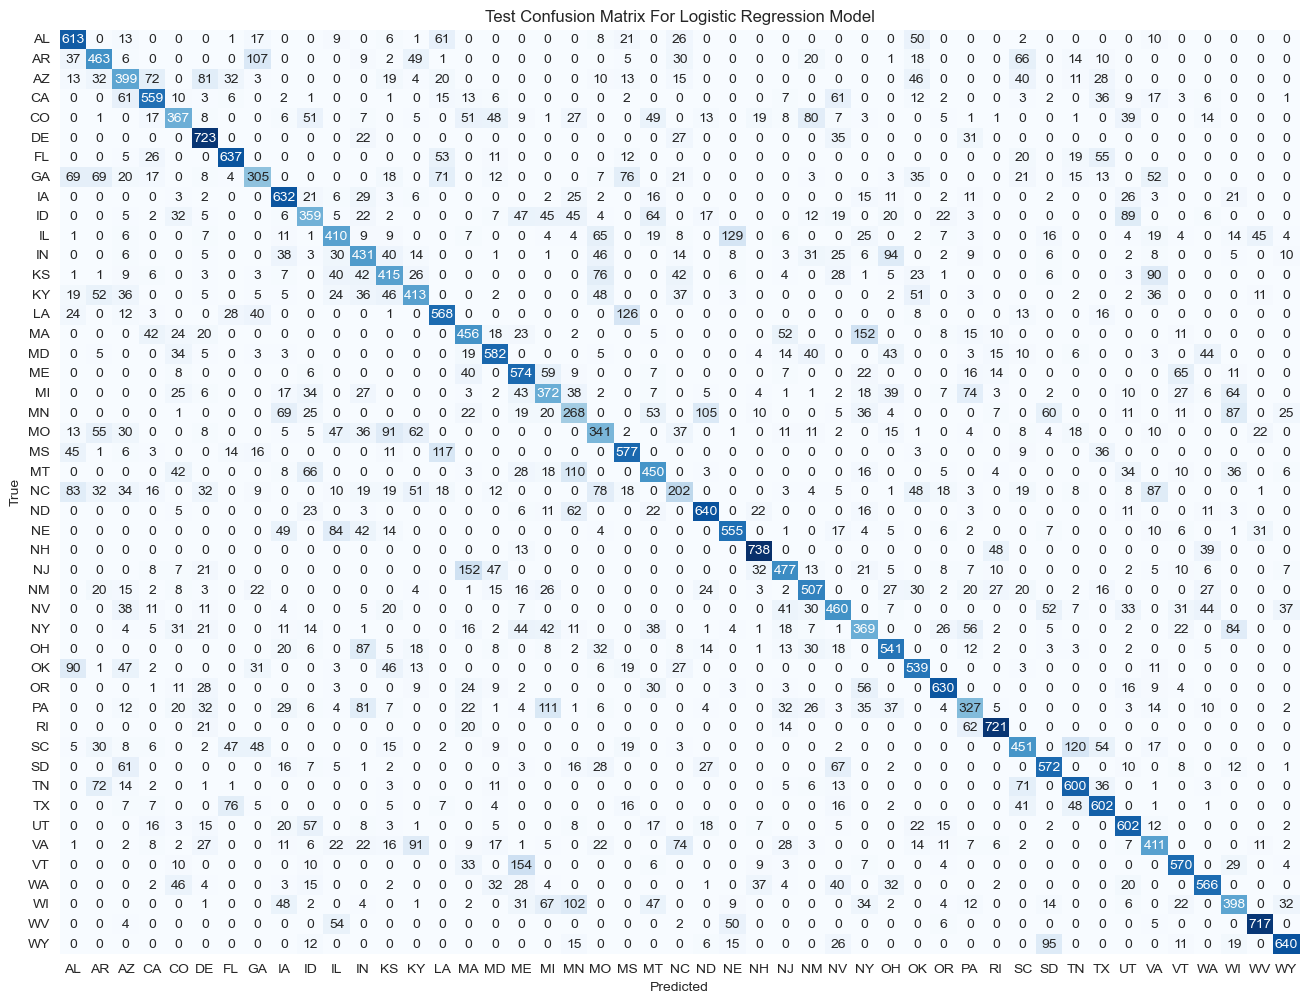

In [143]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], logreg_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Logistic Regression Model')
plt.show()

Looking at the confusion matrix of the logistic regression model, we can see that it makes a lot of correct predictions as evidenced by the diagonal line for all true positive instances. But as evidenced by the number of predictions outside the diagonal line, the model also has a lot of false positive and negative instances. The number of correct and incorrect predictions seems to be almost even, with more correct predictions.  

###### SVM Classifier

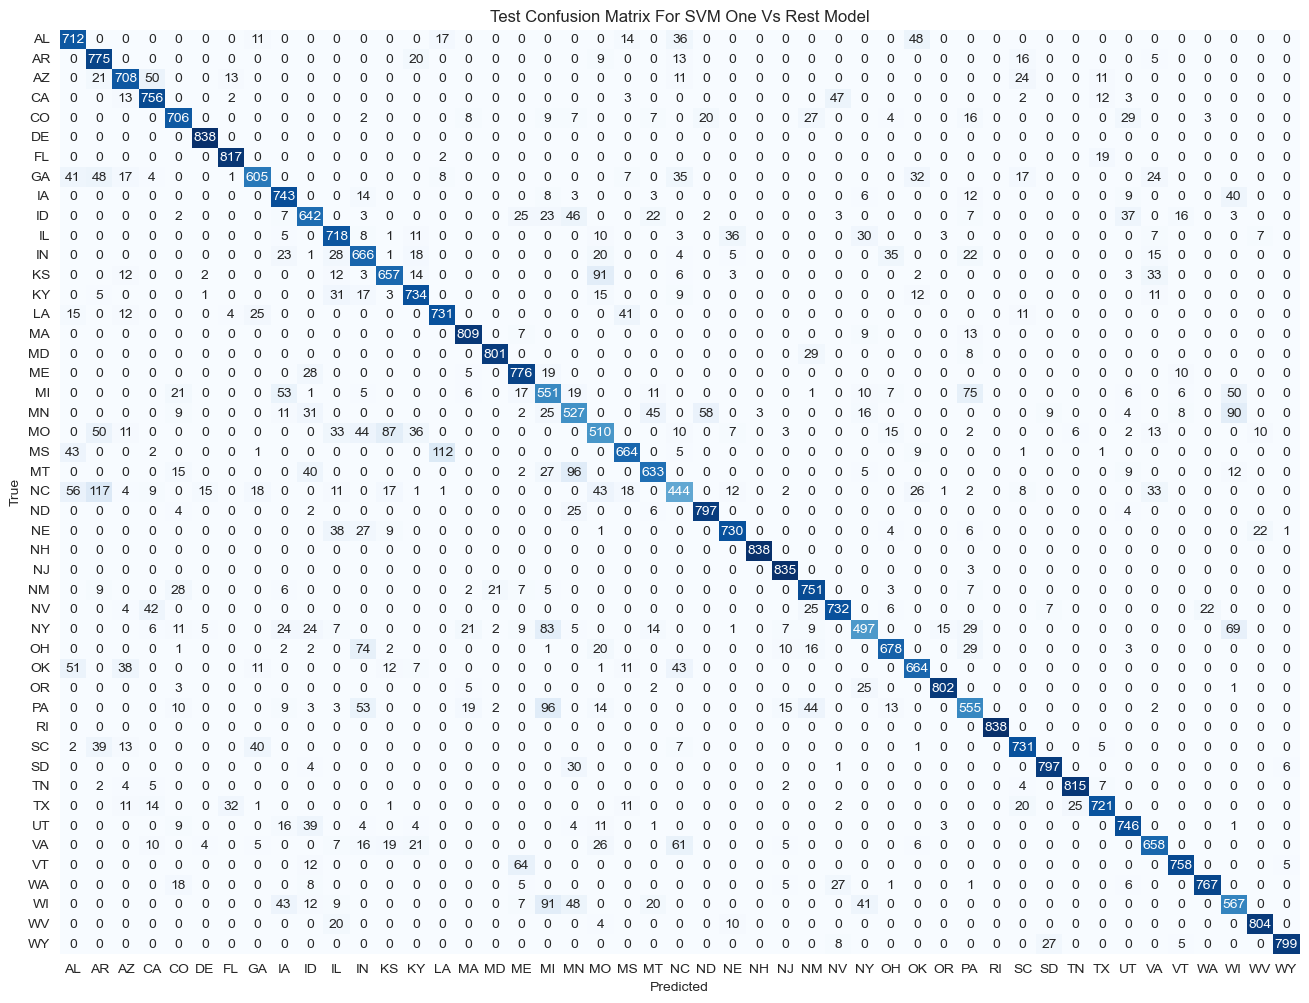

In [144]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs Rest Model')
plt.show()

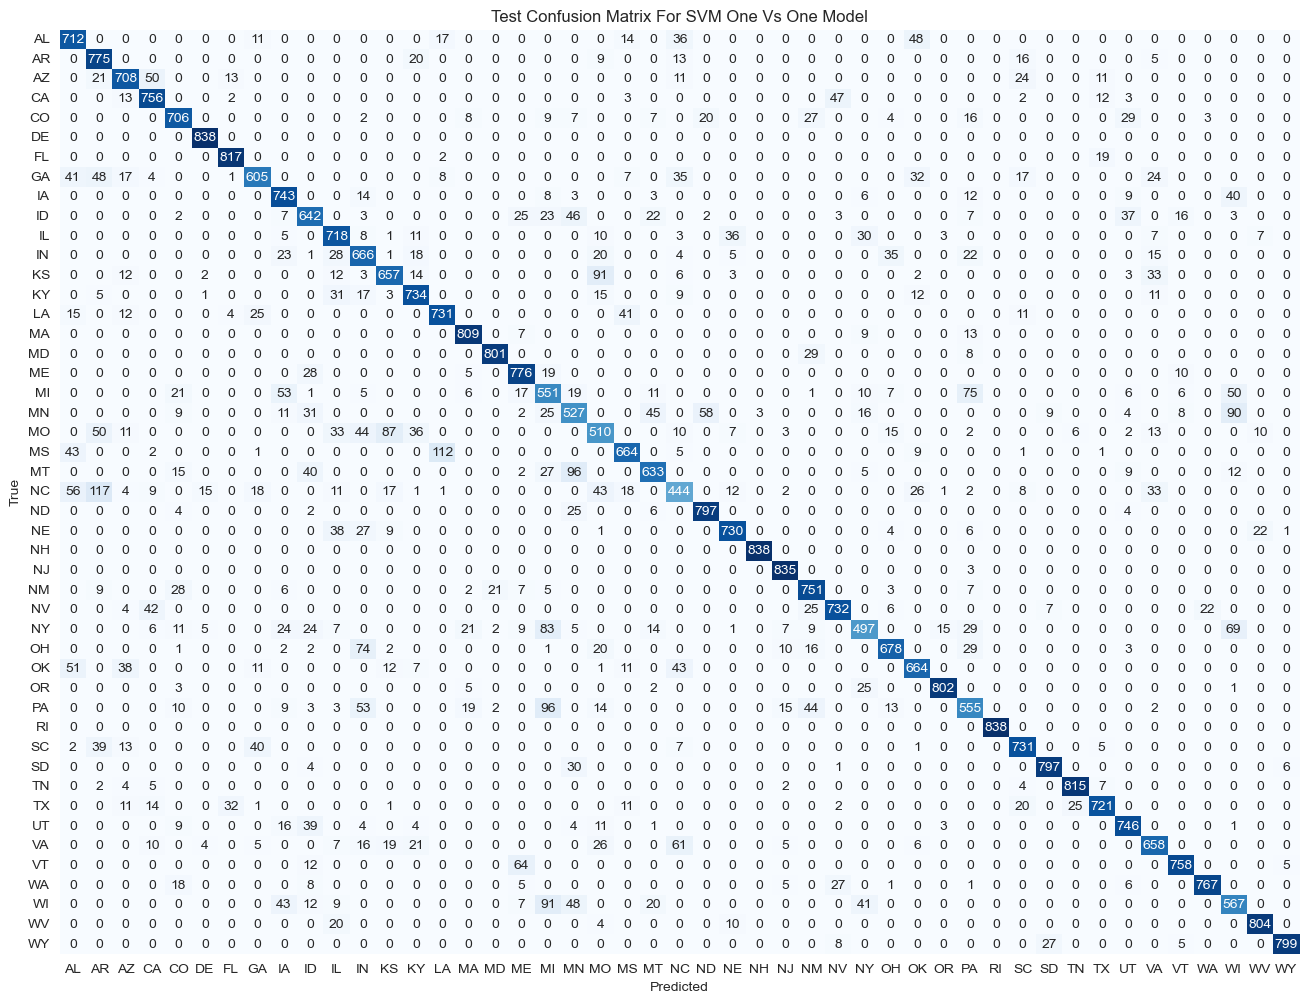

In [145]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], svm_pred_ova), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For SVM One Vs One Model')
plt.show()

Now we see that for both SVM models, the confusion matrix is a lot cleaner than the Logistic Regression Model. The models' higher accuracy, precision, recall and f1 scores is evidenced by the strong diagonal line going through the confusion matrix. Although better, These models still have some false negative and positive instances as shown by the number of predictions outside the diagonal line. Even with the high scores, we can see that both models often times confuse similar classes, leading to higher false negative predictions. This is clearly seen in the data for the 'MO' state, which while having a relatively high number of correct predictions, the mistakes it makes are all for similar classes.

###### Naive Bayes

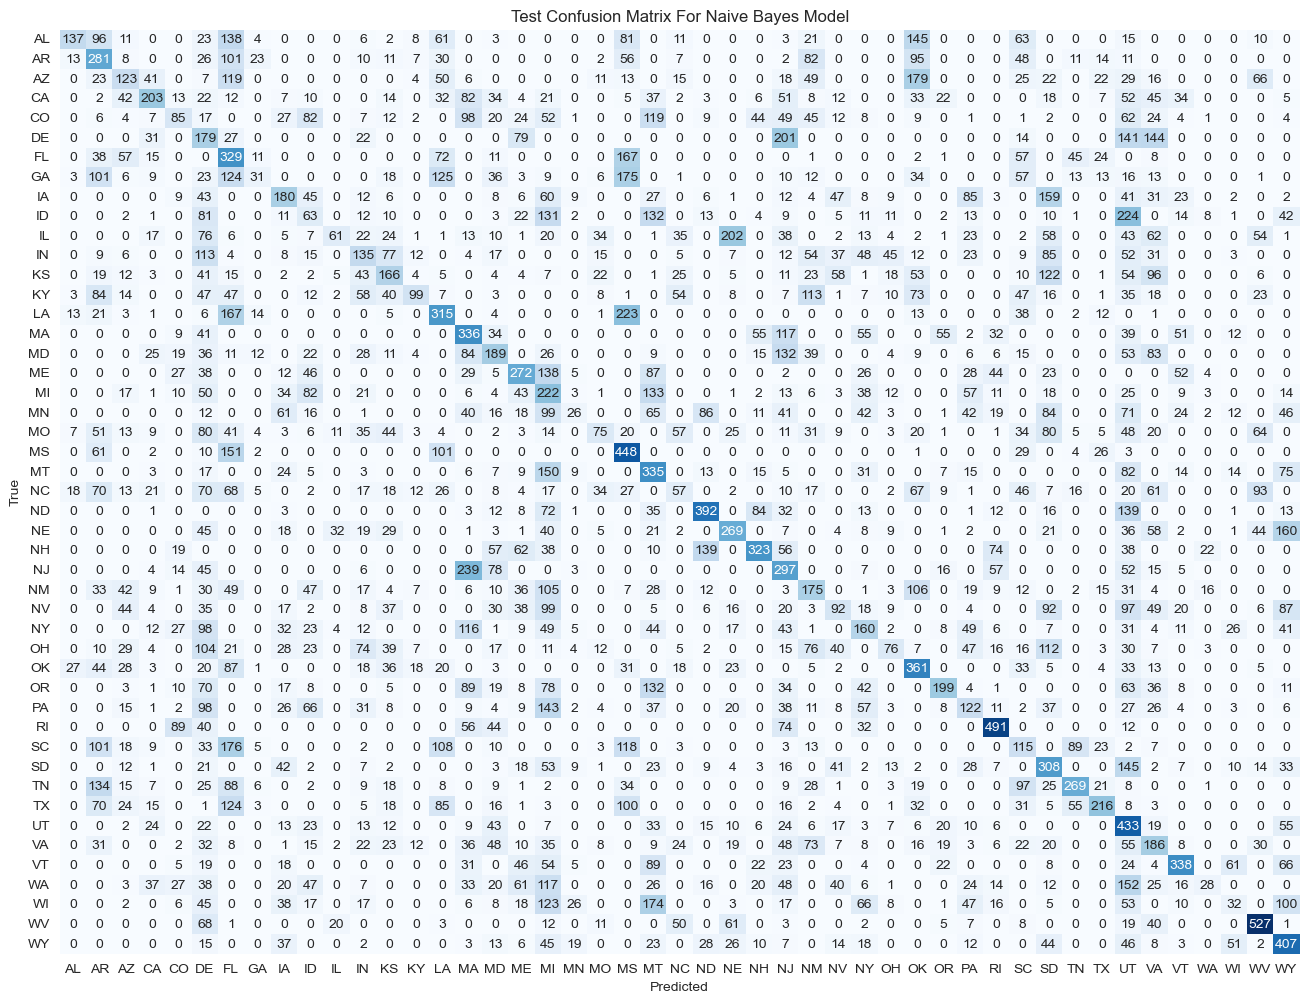

In [146]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(y_test_s['state'], nb_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Naive Bayes Model')
plt.show()

The Naive Bayes is seems to be the worst model so far, as shown by its messy confusion model. Unlike other models, there is no clear diagonal line. Instead it seems that the diagonal is often broken in several points, where the model's predictions seem completely wrong. This shows that the Naive bayes model, while being good for some classes, completely breaks down for other classes. This leads to a messy confusion matrix with its predictions being all over the place.

###### Custom Neural Network

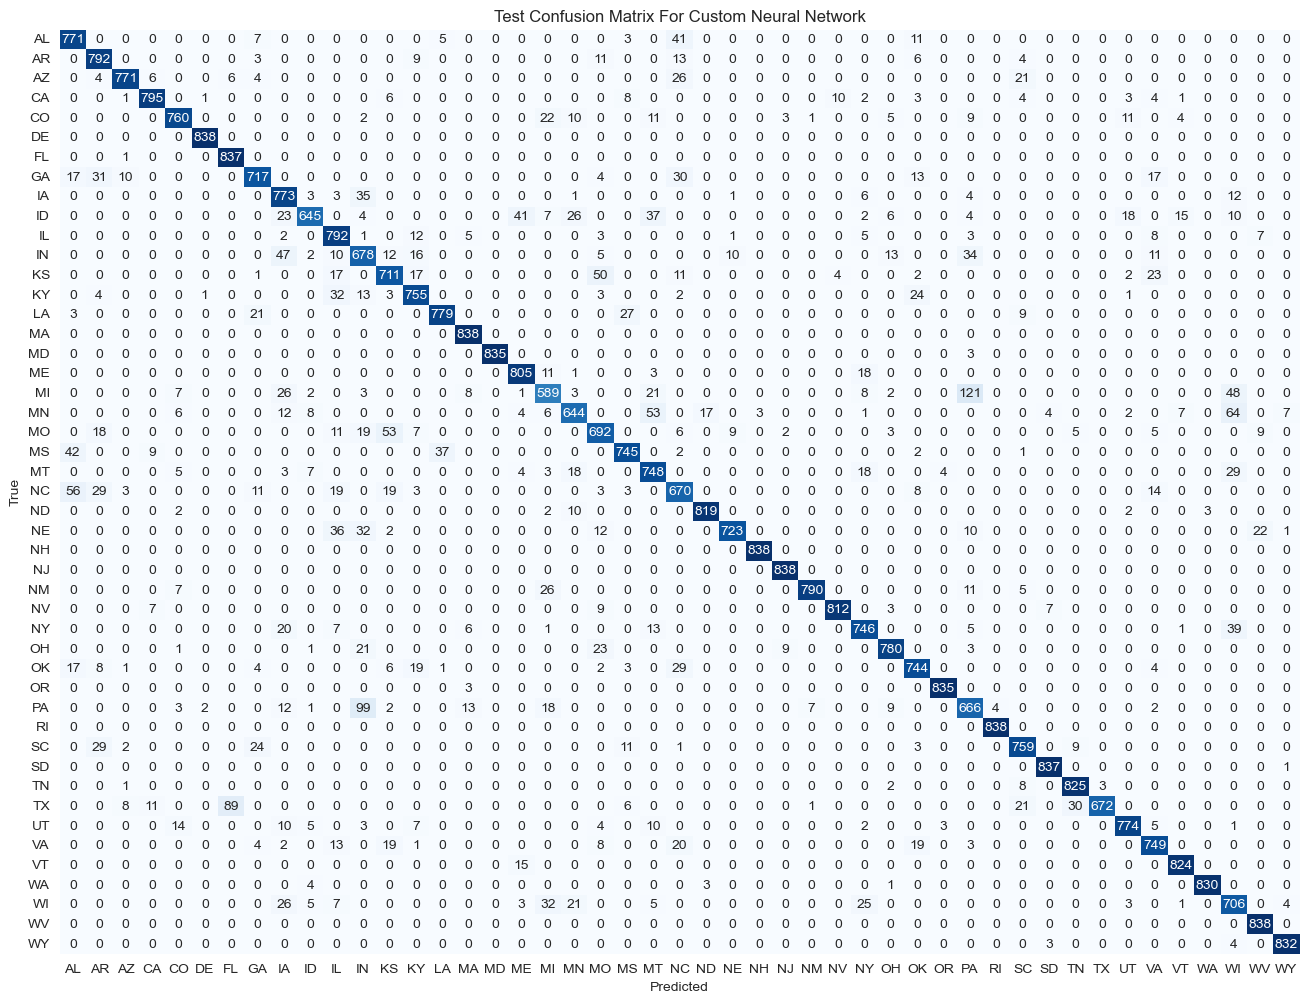

In [149]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(nn_true, nn_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Test Confusion Matrix For Custom Neural Network')
plt.show()

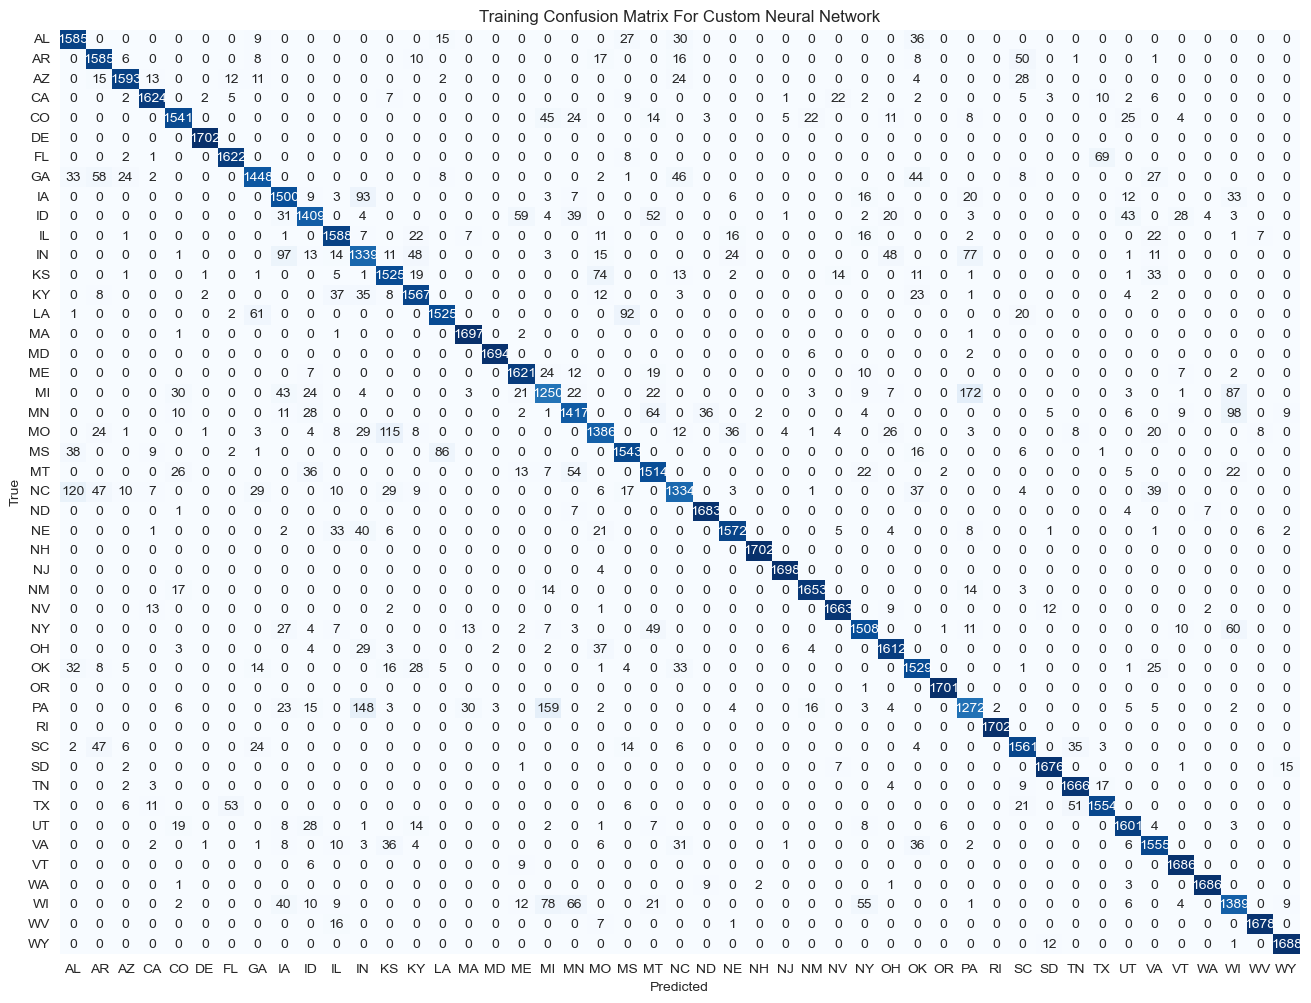

In [147]:
plt.figure(figsize=(16, 12))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Training Confusion Matrix For Custom Neural Network')
plt.show()

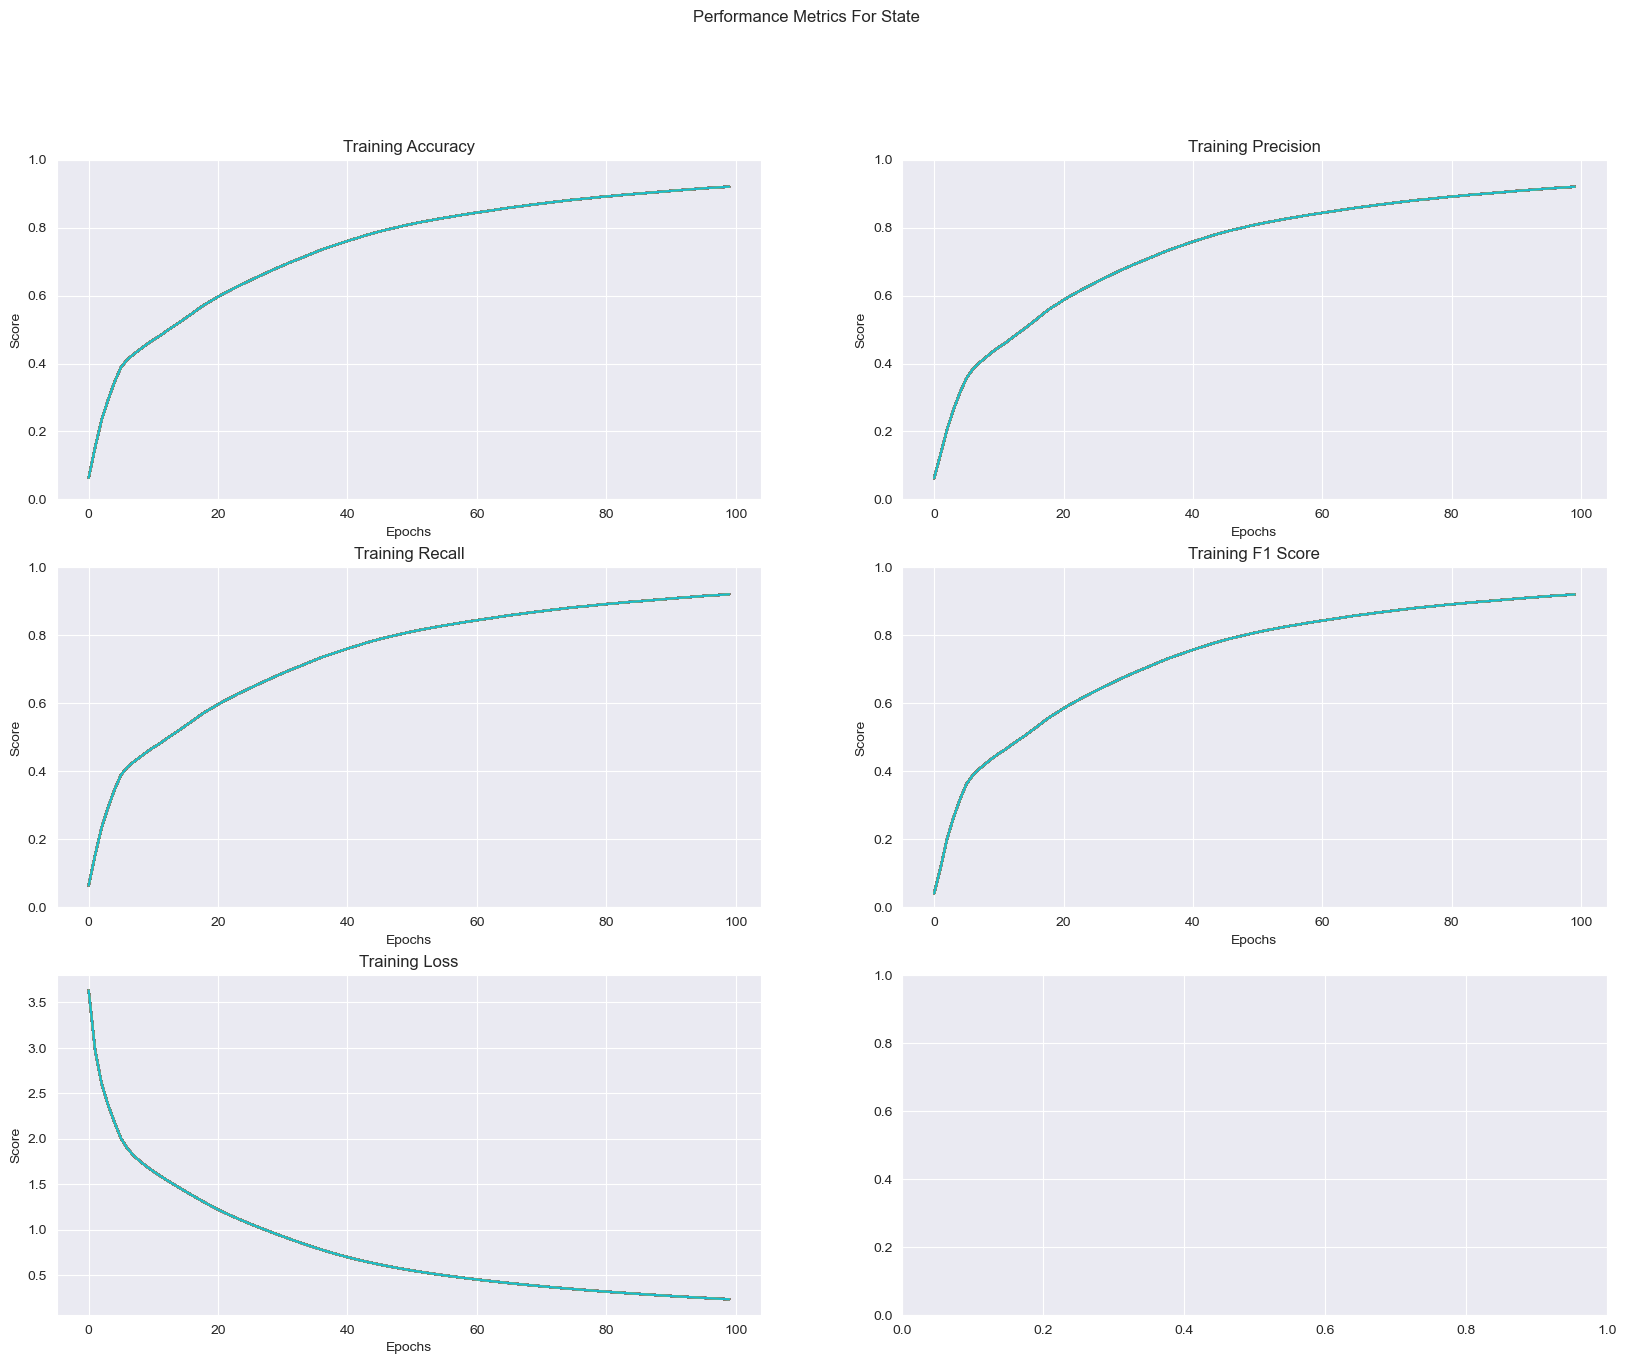

In [148]:
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Performance Metrics For State')

ep = range(epochs)

for e in ep:

    axs[0, 0].plot(ep, train_acc)
    axs[0, 0].set_title('Training Accuracy')
    axs[0, 0].set_xlabel('Epochs')
    axs[0, 0].set_ylabel('Score')
    axs[0, 0].set_ylim(0, 1)


    axs[0, 1].plot(ep, train_pre, label='Train')
    axs[0, 1].set_title('Training Precision')
    axs[0, 1].set_xlabel('Epochs')
    axs[0, 1].set_ylabel('Score')
    axs[0, 1].set_ylim(0, 1)


    axs[1, 0].plot(ep, train_rec, label='Train')
    axs[1, 0].set_title('Training Recall')
    axs[1, 0].set_xlabel('Epochs')
    axs[1, 0].set_ylabel('Score')
    axs[1, 0].set_ylim(0, 1)

    
    axs[1, 1].plot(ep, train_f1, label='Train')
    axs[1, 1].set_title('Training F1 Score')
    axs[1, 1].set_xlabel('Epochs')
    axs[1, 1].set_ylabel('Score')
    axs[1, 1].set_ylim(0, 1)

    axs[2, 0].plot(ep, train_loss, label='Train')
    axs[2, 0].set_title('Training Loss')
    axs[2, 0].set_xlabel('Epochs')
    axs[2, 0].set_ylabel('Score')


plt.show()

Finally, for our custom neural network, we can see the cleanest confusion matrices so far out of all the models. Both the training and testing confusion matrices show similar clear diagonal lines through the confusion matrix.This pattern is shown for both the training and testing set, showing us that the model is not overfitted on the training data.  

Although the model makes some mistakes, as evidenced by the incorrect predictions outside the diagonal line, the mistakes are lower than other models. And unlike models like SVM, its mistakes are not spread out over several closely related classes. And while it can still mistake similar classes for one another, its mistakes are mostly for very similar classes, as shown by very few back to back false negatives for similar classes.  

We can also get a better feel for the neural networks training performance by the graphs of its  various scores and losses.

The Accuracy, Precision, Recall and F1 Scores all show similar graphs all thoughout the training process. And while they all start out show, see see significant jumps in performance in around five epochs, after which it slows down to a steady increase. This continues up until the end of 100 epochs, where its able to achieve a respectable score of around 90%. This slow increase shows that the model learns slowly but surely. This is further evidenced by the small differences in the training and testing scores, which disproves any notion of the model overfitting.

The loss graph also seems to back up this data, with rapid decrease of loss scores up until five epochs, after which the loss decreases slowly until the model finishes training. The loss graph seems like a mirror image of the other scores graphs, showing the linear relationship between the accuracy, precision, recall, f1 score and loss. 